In [1]:
import params
import model
import matplotlib.pyplot as plt
import jax
import jax.numpy as np

In [2]:
# simulation
tissue_size = (125, 125)  #cm
dx = 1  # cm/pixel, Fenton 1998 recommends ~200,300 micron/pixel 
dt = 0.1  # ms
shape = (int(tissue_size[0] / dx), int(tissue_size[1] / dx))  # 
length = 300  # ms
d = 0.05  # cm/ms
cell_parameters = params.params3()

# stimuli
stimulated = int(shape[0] / 5)
field = np.zeros(shape)
field = jax.ops.index_update(field, jax.ops.index[0:stimulated], .8)
s1 = {
    "field": field,
    "start": 0,
    "duration": 2,
    "period": 0  # non-cyclic
}

field2 = np.zeros(shape)
field2 = jax.ops.index_update(field, jax.ops.index[:, -stimulated:], .5)
s2 = {
    "field": field2,
    "start": 200,
    "duration": 2,
    "period": 0  # non-cyclic
}

field3 = np.zeros(shape)
field2 = jax.ops.index_update(field, jax.ops.index[2 * stimulated:2 * stimulated + 2 * stimulated], .5)
s3 = {
    "field": field3,
    "start": 360,
    "duration": 15,
    "period": 0  # non-cyclic
}

/home/epignatelli/repos/jax/jax/lib/xla_bridge.py:123: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [3]:
print(shape)
print("n_iter", int(length / dt))

(125, 125)
n_iter 3000


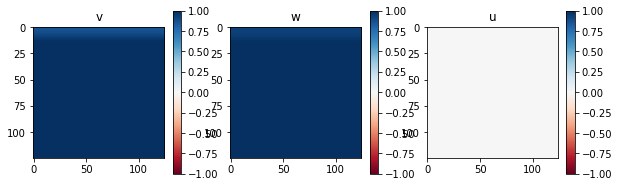

In [4]:
state = model._forward(shape, int(length / dt), cell_parameters, np.ones(shape) * d, [s1], dt, dx)
model.show(state)

Starting simulation with (125, 125) dof for 300ms (3000 iterations with dt 0.100000)
t: 50


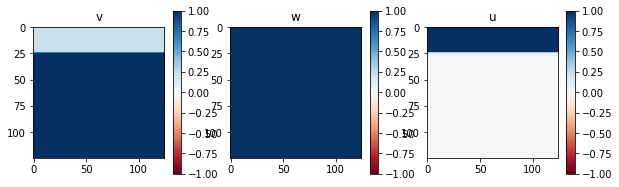

t: 100


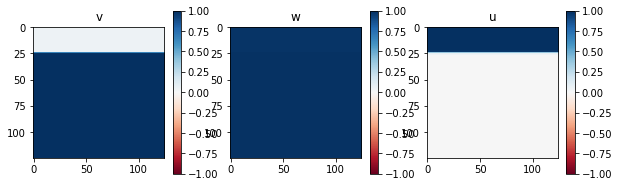

t: 150


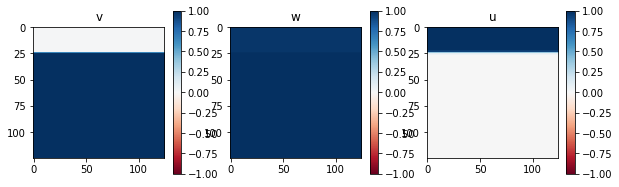

t: 200


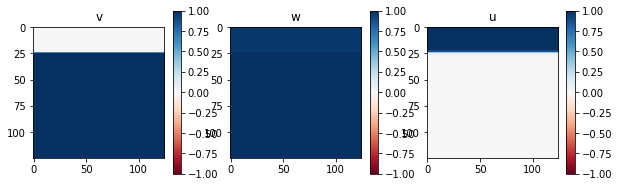

t: 250


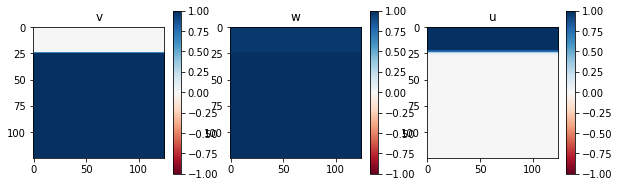

t: 300


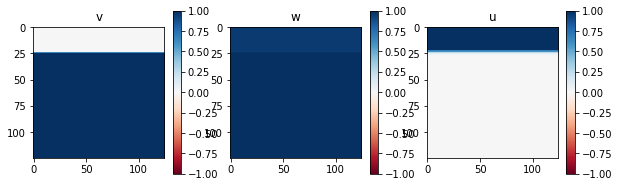

t: 350


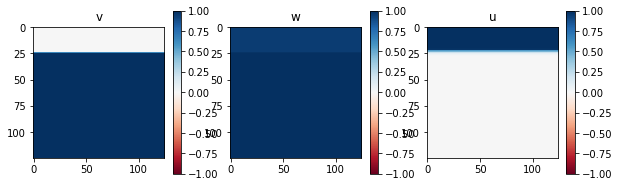

t: 400


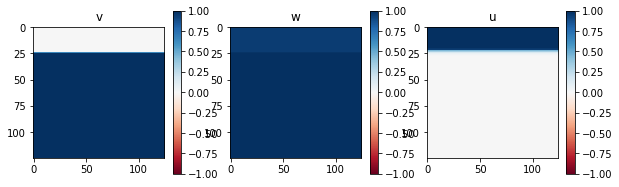

t: 450


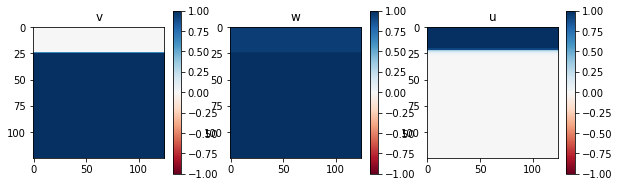

t: 500


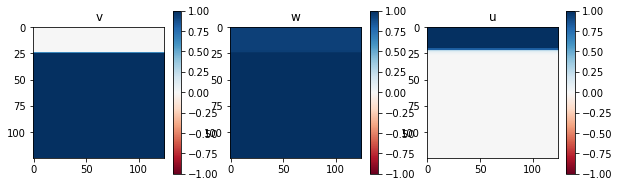

t: 550


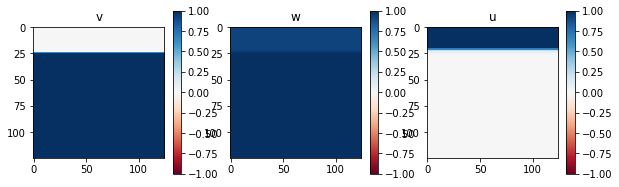

t: 600


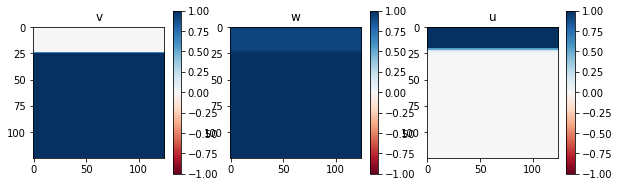

t: 650


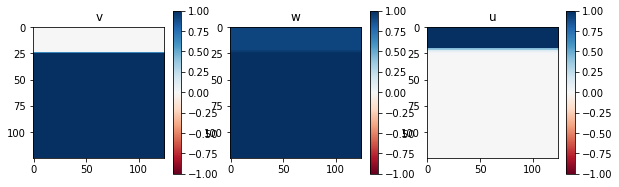

t: 700


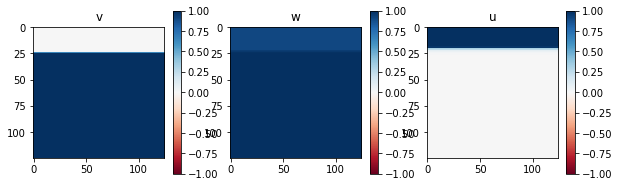

t: 750


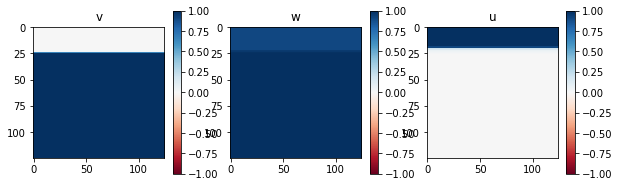

t: 800


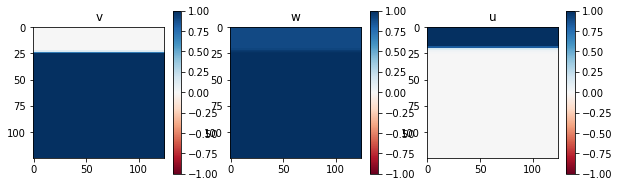

t: 850


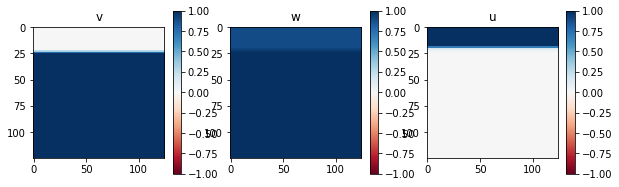

t: 900


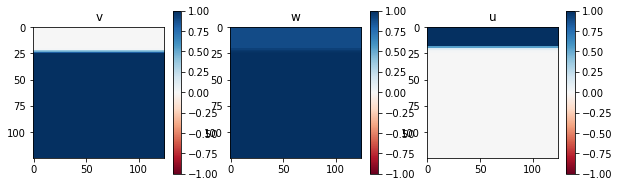

t: 950


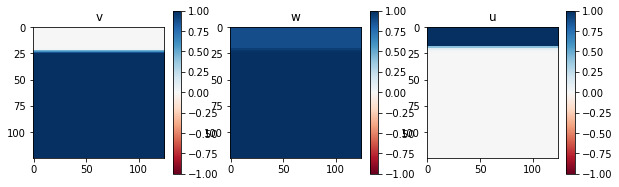

t: 1000


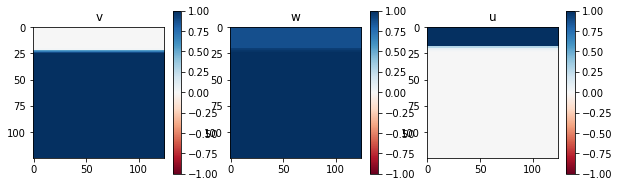

t: 1050


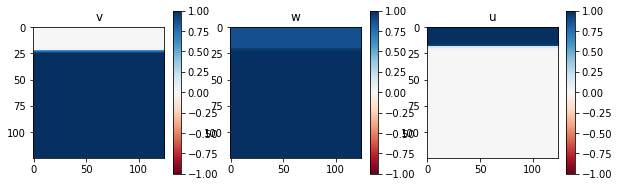

t: 1100


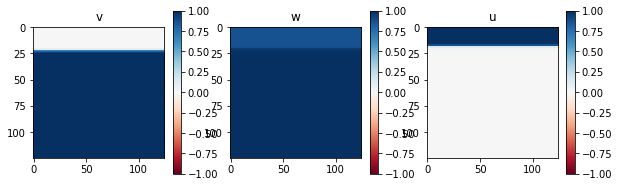

t: 1150


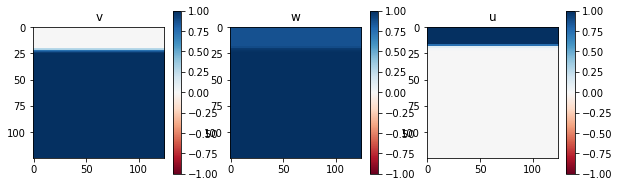

t: 1200


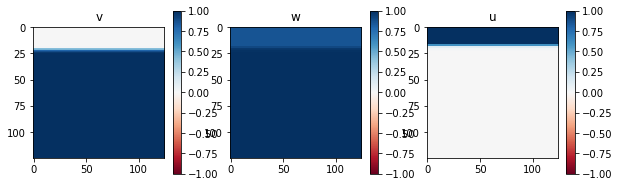

t: 1250


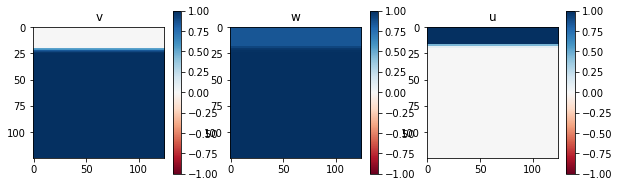

t: 1300


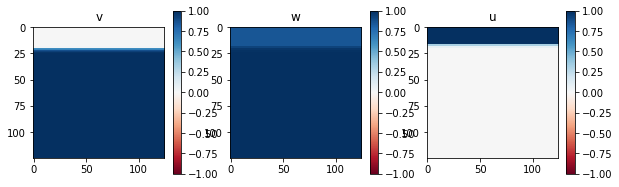

t: 1350


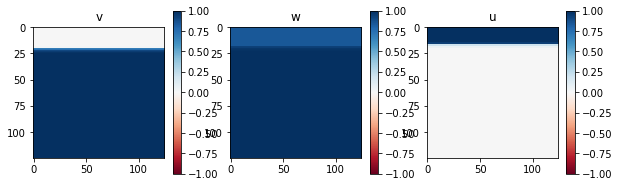

t: 1400


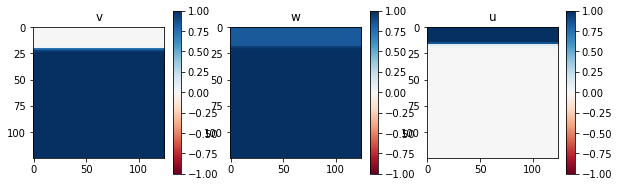

t: 1450


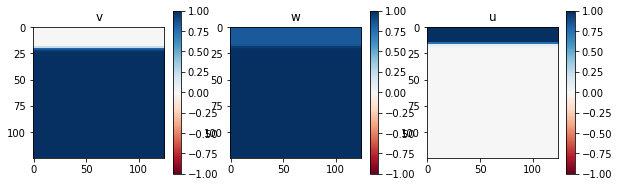

t: 1500


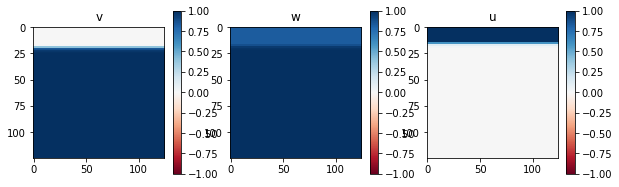

t: 1550


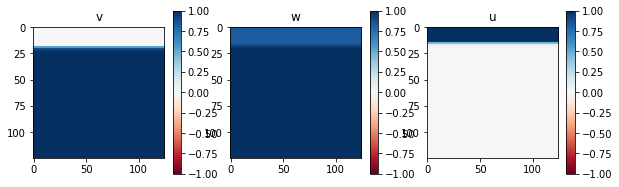

t: 1600


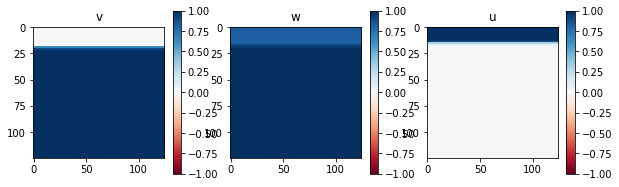

t: 1650


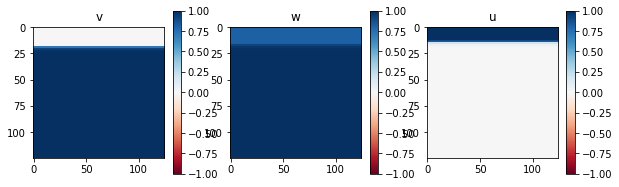

t: 1700


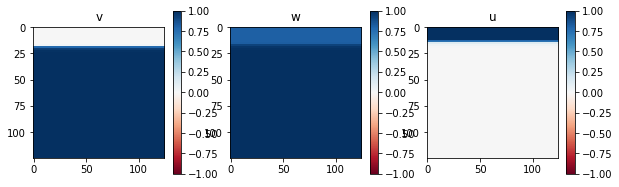

t: 1750


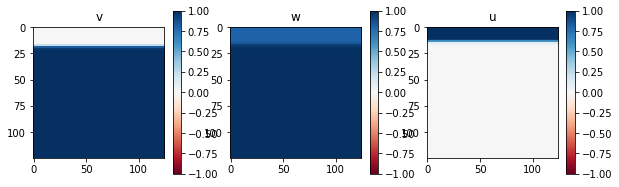

t: 1800


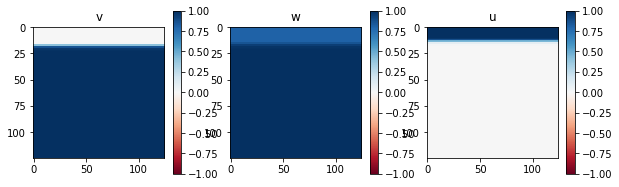

t: 1850


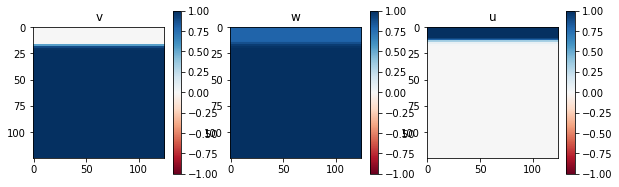

t: 1900


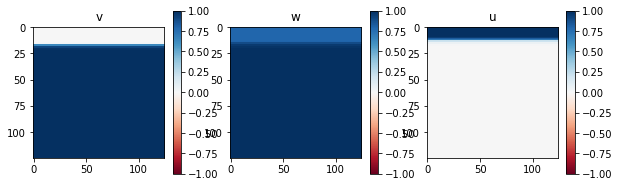

t: 1950


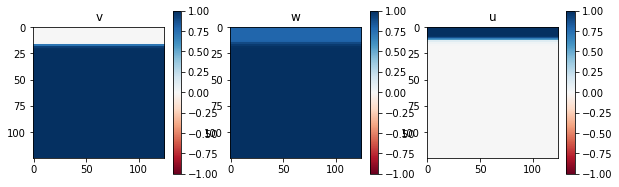

t: 2000


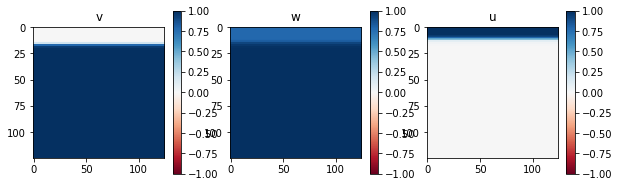

t: 2050


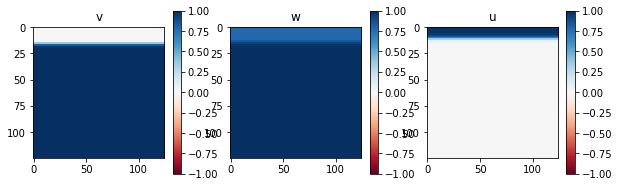

t: 2100


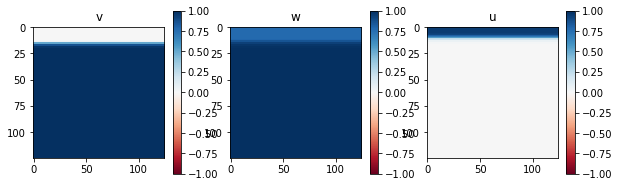

t: 2150


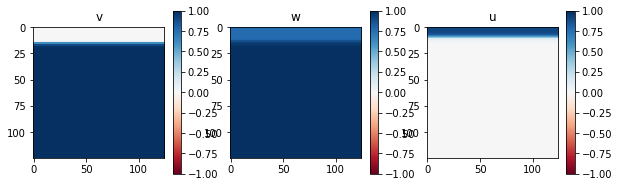

t: 2200


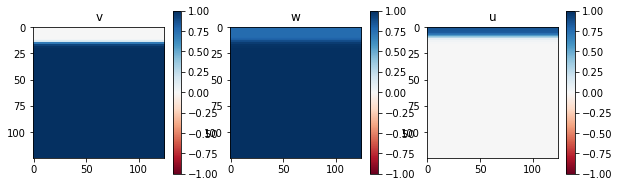

t: 2250


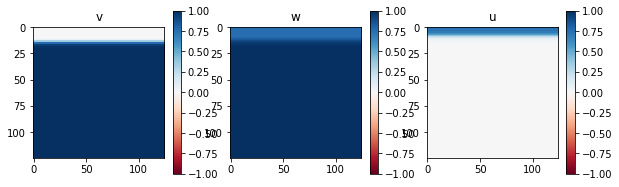

t: 2300


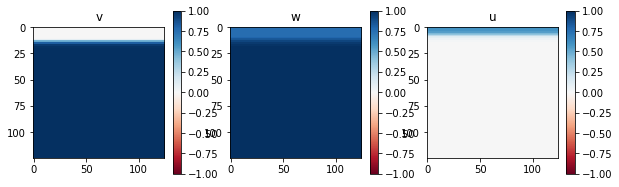

t: 2350


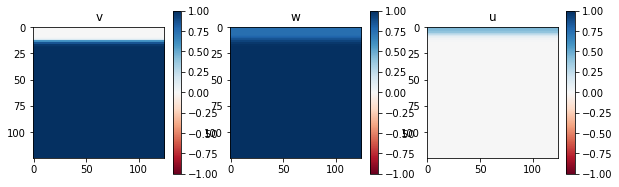

t: 2400


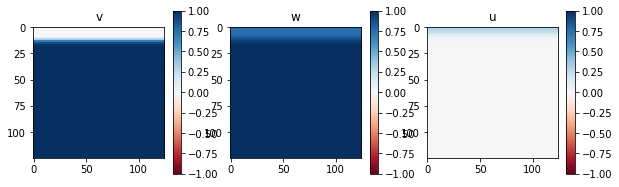

t: 2450


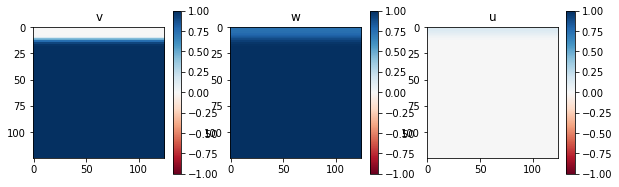

t: 2500


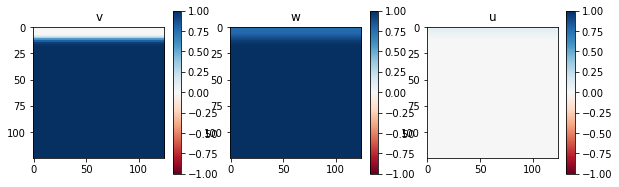

t: 2550


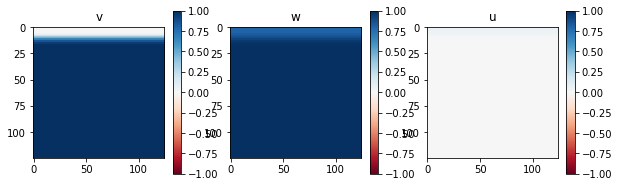

t: 2600


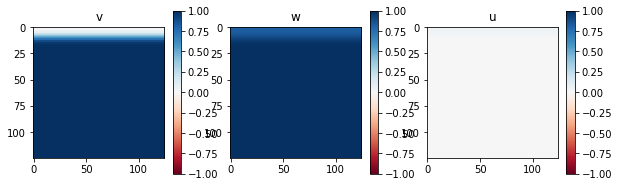

t: 2650


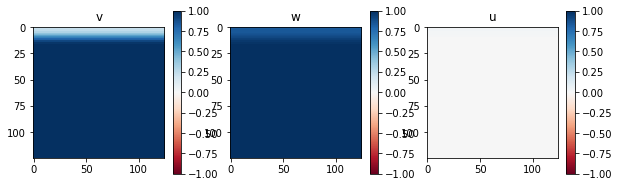

t: 2700


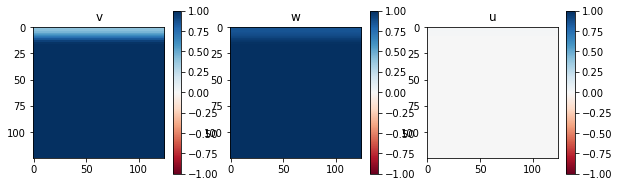

t: 2750


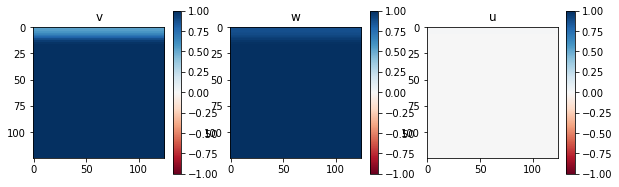

t: 2800


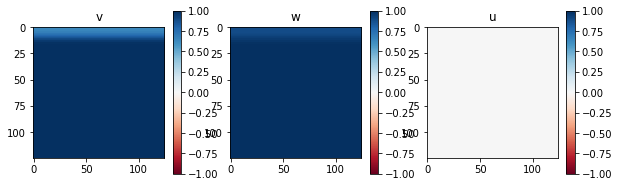

t: 2850


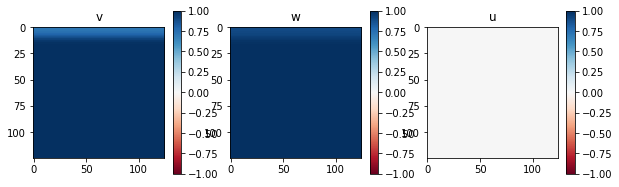

t: 2900


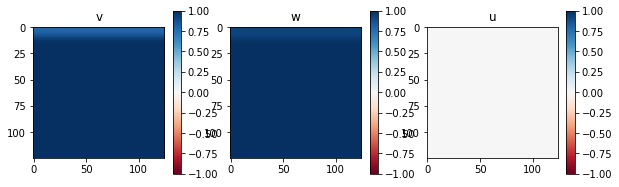

t: 2950


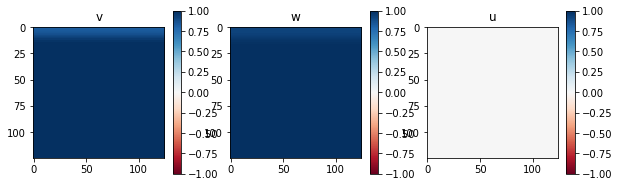

t: 3000


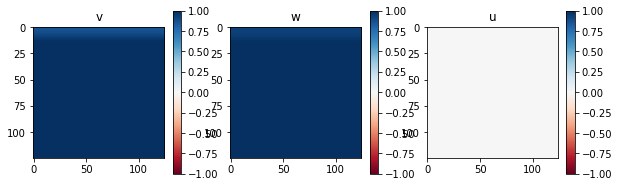

t: 2950


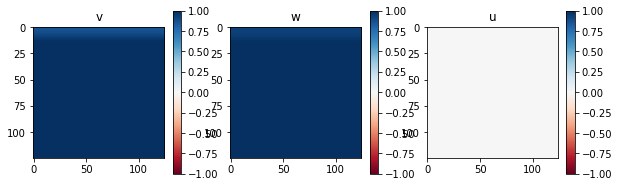

In [5]:
state = model.forward(tissue_size=tissue_size,
                      cell_parameters=cell_parameters,
                      end_time=length,
                      diffusion=d,
                      stimuli=[s1],
                      dt=dt,
                      dx=dx,
                      log_at=50)

In [6]:
state

(DeviceArray([[0.8716002, 0.8716002, 0.8716002, ..., 0.8716002, 0.8716002,
               0.8716002],
              [0.8716002, 0.8716002, 0.8716002, ..., 0.8716002, 0.8716002,
               0.8716002],
              [0.8716002, 0.8716002, 0.8716002, ..., 0.8716002, 0.8716002,
               0.8716002],
              ...,
              [0.9999942, 0.9999942, 0.9999942, ..., 0.9999942, 0.9999942,
               0.9999942],
              [0.9999942, 0.9999942, 0.9999942, ..., 0.9999942, 0.9999942,
               0.9999942],
              [0.9999942, 0.9999942, 0.9999942, ..., 0.9999942, 0.9999942,
               0.9999942]], dtype=float32),
 DeviceArray([[0.933064  , 0.933064  , 0.933064  , ..., 0.933064  ,
               0.933064  , 0.933064  ],
              [0.933064  , 0.933064  , 0.933064  , ..., 0.933064  ,
               0.933064  , 0.933064  ],
              [0.933064  , 0.933064  , 0.933064  , ..., 0.933064  ,
               0.933064  , 0.933064  ],
              ...,
         